In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import findconnections as fc
import selfpropelledparticlevoronoi as sppv
import matplotlib.font_manager as font_manager
# from matplotlib import rc
import importlib

import matplotlib.axes as axx

# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as font_manager
from matplotlib import rc,ticker
from matplotlib.tri import Triangulation
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema
from scipy.optimize import minimize
import sys
import readTissueFiles as rTF

In [6]:
size_of_wound = 3

In [4]:
font = font_manager.FontProperties(family='Nimbus Roman',
                                   style='normal', size=30)
font1 = {'family' : 'Nimbus Roman',
        'size'   : 30}
rc('font', **font1)

In [7]:
dataset = rTF.open_tissuefile('tissue/size'+str(size_of_wound),0)

In [8]:
coords = dataset['centers']
vorPointRegion1 = dataset['point regions']
vorRegions = dataset['regions']
                
# coords = np.array(coords)
N = len(coords[:,0])
print(N)

vertices = dataset['vertices']
# vertices = np.array(vertices)

#print(vorPointRegion)

vorRidges = dataset['Edge connections']

wloc = dataset['WoundLoc']

vorPointRegion= []
for i in range(N):
    vorPointRegion.append(i)

Boundaries = dataset['boundaries']

223


In [5]:
Rot1 = np.linalg.inv(np.array([[1,0],[-0.275,1]]))
Rot2 = np.linalg.inv(np.array([[1,-0.275],[0,1]]))

In [6]:
# vertices = np.dot(np.dot(vertices,Rot1),Rot2)

In [9]:
vor = Voronoi(coords)
vor.point_region = vorPointRegion
vor.regions = vorRegions
vor.ridge_vertices = vorRidges
vor.vertices = vertices

# Visualization

## Visualize centers

(-2.5, 2.5)

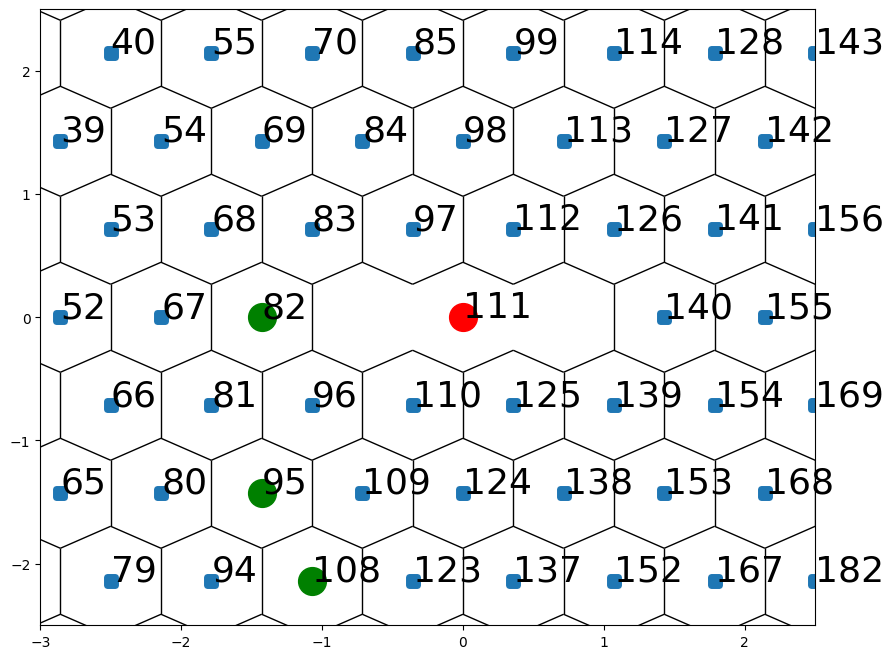

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
voronoi_plot_2d(vor,show_vertices=False,ax=ax,show_points=False)
plt.scatter(coords[:,0], coords[:,1],marker='s',linewidths=5)
for i, txt in enumerate(vorPointRegion):
    plt.annotate(int(txt),(coords[i,0], coords[i,1]),fontsize=26)
    
plt.plot(coords[wloc,0],coords[wloc,1],'ro',ms=20)
plt.plot(coords[[95,108,82],0],coords[[95,108,82],1],'go',ms=20)
# plt.plot(vertices[list(np.array(Boundaries[1])[ordered_boundary]),0],vertices[list(np.array(Boundaries[1])[ordered_boundary]),1],'ro-',lw=15)
plt.xlim(-3,2.5)
plt.ylim(-2.5,2.5)
# fig.savefig("PointsToLookAt4.png", dpi = 600,bbox_inches='tight')

## Visualize vertices

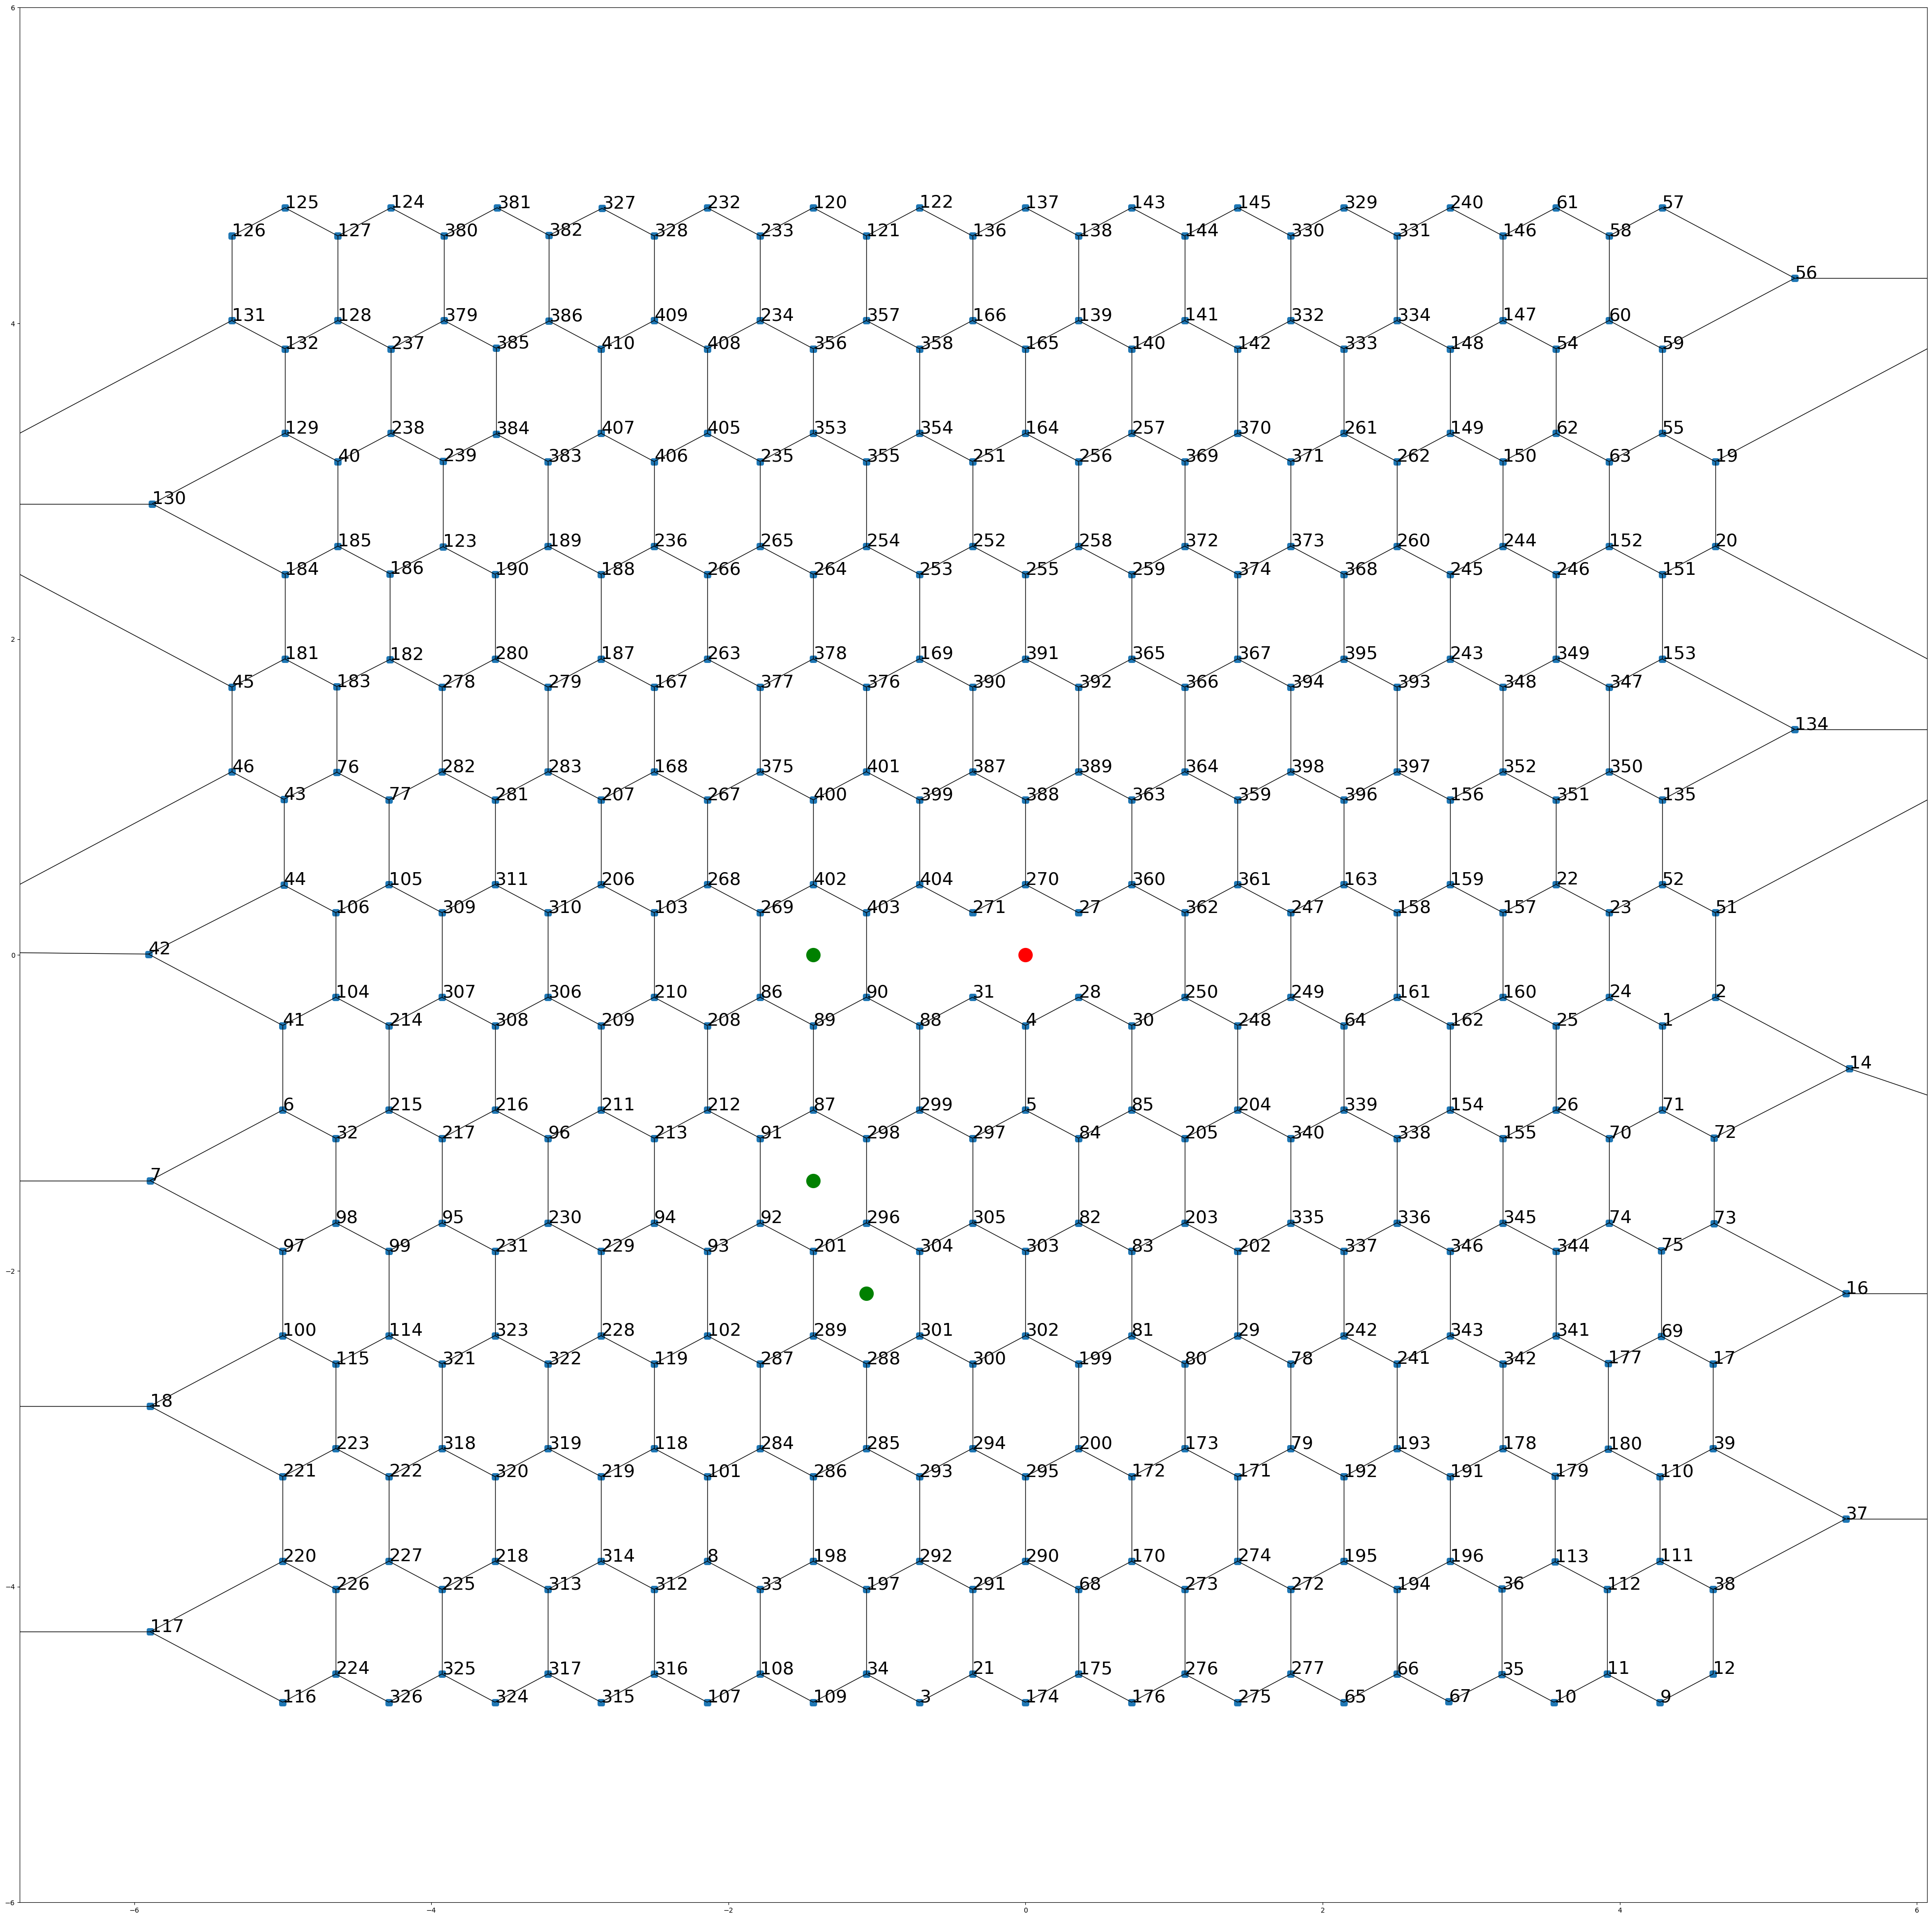

In [23]:
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111)
voronoi_plot_2d(vor,show_vertices=False,ax=ax,show_points=False)
plt.scatter(vertices[:,0], vertices[:,1],marker='s',linewidths=5)
for i, txt in enumerate(np.arange(0,len(vertices))):
    plt.annotate(int(txt),(vertices[i,0], vertices[i,1]),fontsize=26)
    
plt.plot(coords[wloc,0],coords[wloc,1],'ro',ms=20)
plt.plot(coords[[95,108,82],0],coords[[95,108,82],1],'go',ms=20)
# plt.plot(vertices[list(np.array(Boundaries[1])[ordered_boundary]),0],vertices[list(np.array(Boundaries[1])[ordered_boundary]),1],'ro-',lw=15)
# plt.xlim(-3,2.5)
# plt.ylim(-2.5,2.5)
# fig.savefig("PointsToLookAtVertices4.png", dpi = 100,bbox_inches='tight')

In [ ]:
[34,31,27,104,221,207,74]

In [24]:
def ev(vertex):
    return sppv.energy_vor_v2(vorPointRegion,vorRegions,vorRidges,vertices,vertex,1,0.885*(np.arange(225)*0+1),1,5.65,Boundaries[0],2.50,107,Boundaries[1])

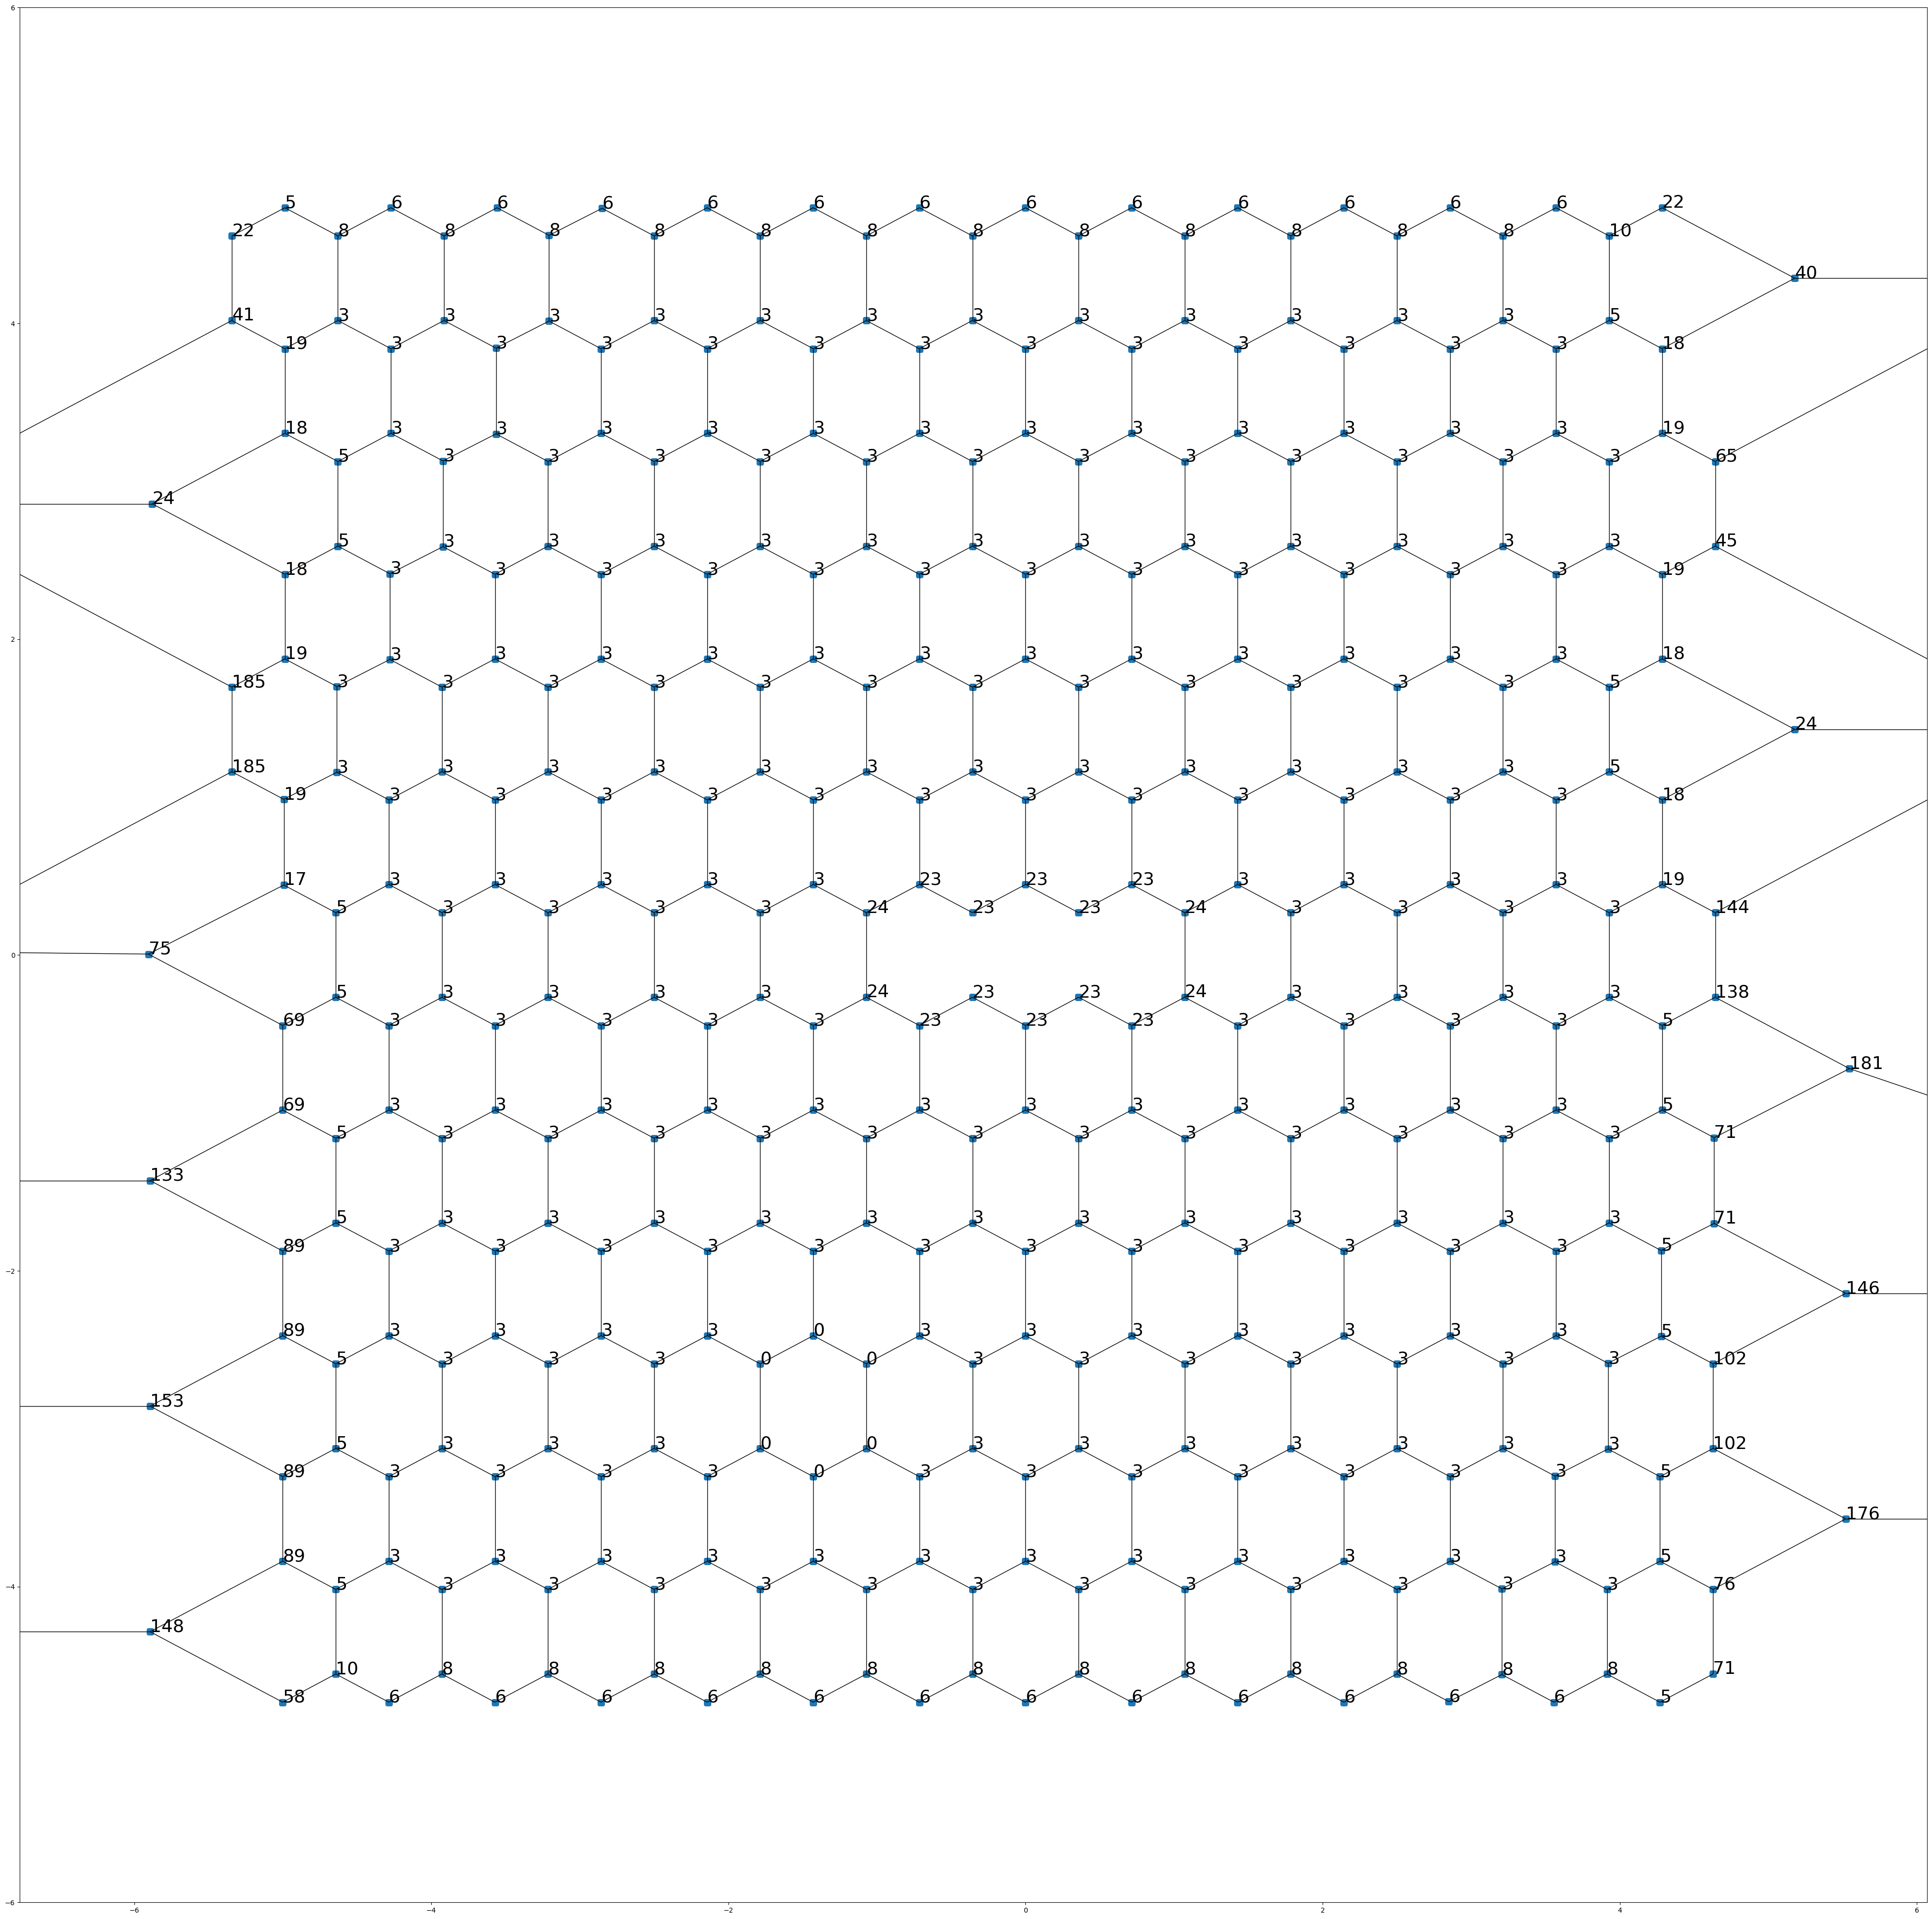

In [25]:
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111)
voronoi_plot_2d(vor,show_vertices=False,ax=ax,show_points=False)
plt.scatter(vertices[:,0], vertices[:,1],marker='s',linewidths=5)
for i, txt in enumerate(np.arange(0,len(vertices))):
    plt.annotate(int(ev(i)),(vertices[i,0], vertices[i,1]),fontsize=26)
# fig.savefig("PointsToLookAtVerticesEnergy5.png", dpi = 100,bbox_inches='tight')

## Visualize Boundaries

In [27]:
lbound_up = np.where(vertices[Boundaries[0],1]>3)
bound_up = np.array(Boundaries[0])[lbound_up]

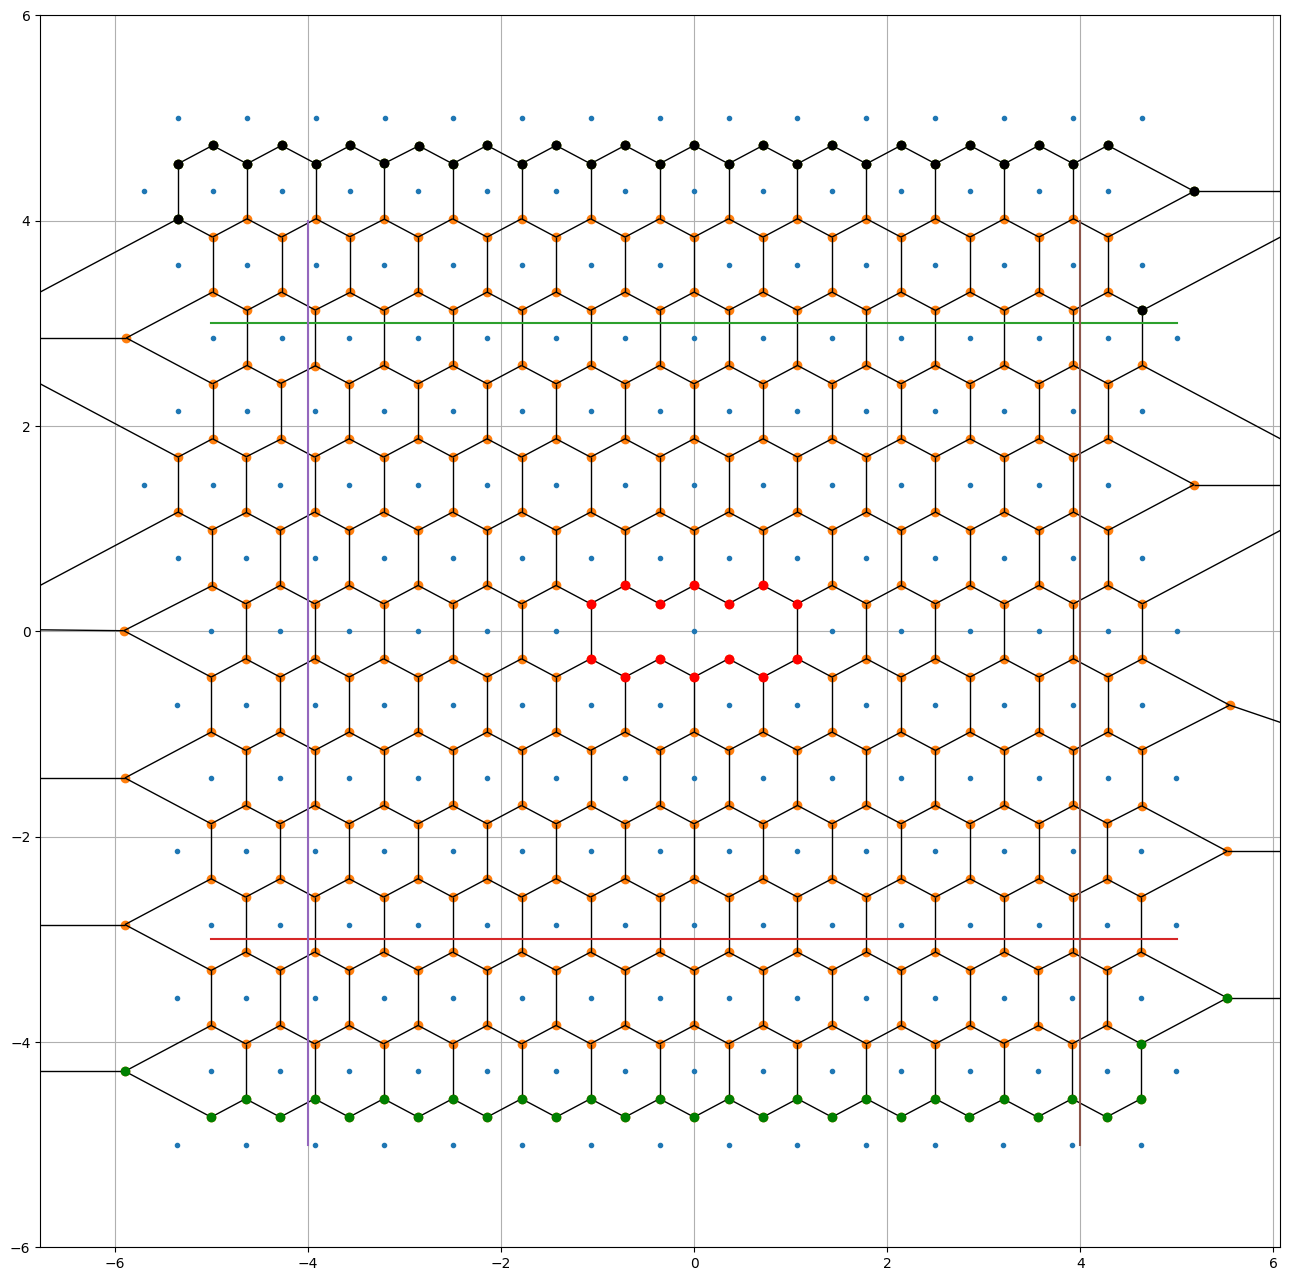

In [28]:

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
voronoi_plot_2d(vor,show_vertices=True,ax=ax)
ax.plot(vertices[Boundaries[1],0],vertices[Boundaries[1],1],'ro')
ax.plot(vertices[np.array(Boundaries[0]),0],vertices[np.array(Boundaries[0]),1],'go')
ax.plot(vertices[bound_up,0],vertices[bound_up,1],'ko')
ax.plot(np.arange(-5,5.5), np.arange(-5,5.5)*0 + 3)
ax.plot(np.arange(-5,5.5), np.arange(-5,5.5)*0 - 3)
ax.plot(np.arange(-5,5)*0-4, np.arange(-5,5))
ax.plot(np.arange(-5,5)*0+4, np.arange(-5,5))  
ax.grid()
# ax.set_xlim([-4,-2])
# ax.set_ylim([-2,0])
#plt.ylim(-0.5,1)
plt.show()

# Test rearrangement of wound area

In [38]:
importlib.reload(sppv)

<module 'selfpropelledparticlevoronoi' from '/home/rafael/Documents/tissuemodelling/SpringNetworkSimul/InternshipCodes/selfpropelledparticlevoronoi.py'>

In [29]:
areaWound0 = sppv.area_vor(vorPointRegion,vorRegions,vertices,vorRidges,wloc,True)

[5, 4, 9, 6, 7, 8, 3, 2, 1, 11, 12, 13, 10, 0]


In [14]:
areaBound0 = sppv.area_vor([0],Boundaries,vertices,vorRidges,0,True)

[8, 63, 7, 61, 104, 64]


In [75]:
ordered_boundary =[4, 5, 1, 6, 8, 7, 14, 13, 12, 3, 2, 9, 10, 11, 0,4]

In [76]:
for v in range(len(ordered_boundary)):
    print(v,ordered_boundary[v],vertices[list(np.array(Boundaries[1])[ordered_boundary]),0][v])

0 4 1.4196679165177228
1 5 1.5565702918153548
2 1 1.278776603323376
3 6 1.0009829148313978
4 8 0.5862868510417869
5 7 0.008903512053705154
6 14 -1.1200782660216193
7 13 -1.697461605009702
8 12 -1.8343639803073337
9 3 -1.5565702918153552
10 2 -1.2787766033233763
11 9 -1.0009829148313978
12 10 -0.5862868510417875
13 11 -0.008903512053704765
14 0 0.7053822022320093
15 4 1.4196679165177228


In [77]:
list(np.array(Boundaries[1])[[6,3]])

[184, 125]

In [78]:
ord_bd = [28, 45, 9, 46, 24, 48, 10, 47, 41, 7, 42, 49, 11, 50, 63, 20, 56, 14, 55, 51, 12, 52, 54, 13, 53, 19, 33, 2, 32, 73, 30, 1, 31, 25, 69, 74, 62, 18, 61, 38, 5, 39, 40, 6, 36, 4, 37, 15, 57, 65, 21, 64, 43, 8, 44, 60, 17, 59, 58, 16, 35, 3, 34, 22, 66, 67, 23, 68, 26, 70, 75, 72, 27, 71, 29, 0]

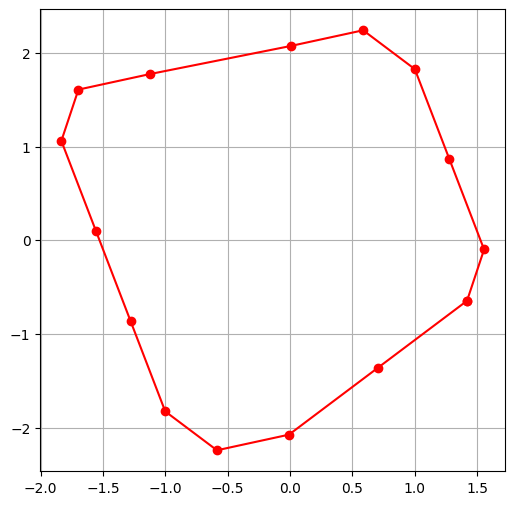

In [79]:
plt.figure(figsize=(6,6))
plt.plot(vertices[list(np.array(Boundaries[1])[ordered_boundary]),0],vertices[list(np.array(Boundaries[1])[ordered_boundary]),1],'ro-')
plt.grid()

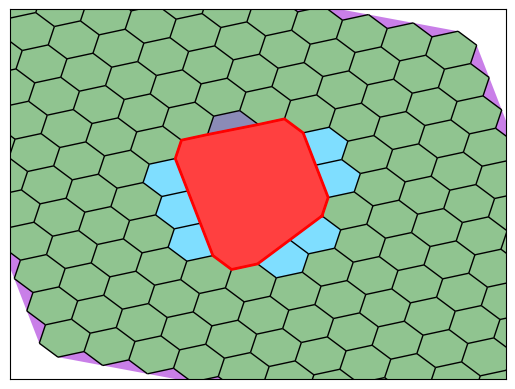

In [81]:
fig = voronoi_plot_2d(vor,show_vertices=False, show_points = False)
fig.figimage
#bound_poly =  [vor.vertices[i] for i in list(np.array(Boundaries[0])[ord_bd]) if fc.norm(vor.vertices[i]) < np.sqrt(2)*5]       
#plt.fill(*zip(*bound_poly),'g',alpha=0.5)

#plt.plot(vertices[list(np.array(Boundaries[0])[ord_bd]),0],vertices[list(np.array(Boundaries[0])[ord_bd]),1],'g-')

wound_poly =  [vor.vertices[i] for i in list(np.array(Boundaries[1])[ordered_boundary]) if fc.norm(vor.vertices[i]) < np.sqrt(2)*5]       
plt.fill(*zip(*wound_poly),'r',alpha=0.75)

for region in vorRegions:
    if not -1 in region:
        polygon = [vertices[j] for j in region if fc.norm(vor.vertices[j]-vor.vertices[wloc]) < np.sqrt(150)]
        if len(polygon) <= 3:
            plt.fill(*zip(*polygon),'darkviolet',alpha=0.5)
        if len(polygon) == 4:
            plt.fill(*zip(*polygon),'midnightblue',alpha=0.5)
        if len(polygon) == 5:
            plt.fill(*zip(*polygon),'deepskyblue',alpha=0.5)
        if len(polygon) == 6:
            plt.fill(*zip(*polygon),'forestgreen',alpha=0.5)
        if (len(polygon) >= 7) and (len(polygon) < 11):
        	plt.fill(*zip(*polygon),'darkorange',alpha=0.5)
        
plt.plot(vertices[list(np.array(Boundaries[1])[ordered_boundary]),0],vertices[list(np.array(Boundaries[1])[ordered_boundary]),1],'r-',lw = 2)
# plt.plot(vertices[134,0],vertices[134,1],'bo',ms = 10)
# plt.figtext(0.31,0.50,"$\mathregular{(x_i, y_i)}$",fontsize= 16, fontstyle = "italic",color = "blue")
# plt.figtext(0.60,0.60,"$\mathregular{\\alpha}$",fontstyle = "italic",color = "darkgreen")
# plt.figtext(0.6,0.47,"$\mathregular{p_\\alpha,a_\\alpha}$",fontsize = 18, fontstyle = "italic",color = "black")
# plt.figtext(0.72,0.41,"$\mathregular{p_\\alpha,a_\\alpha}$",fontsize = 18,fontstyle = "italic",color = "black")
# plt.figtext(0.47,0.50,"$\mathregular{W}$",fontstyle = "italic",color = "red")
# plt.figtext(0.50,0.37,"$\mathregular{p_W}$",fontstyle = "italic",color = "red")
plt.xlim(-5.5,5.5)
plt.ylim(-5.5,5.5)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])       
# fig.savefig("WoundModelHex10.png", dpi = 600,bbox_inches='tight')
plt.show()

